# Customer Churn Predictor

### Business Understanding

#### **Problem Statement** Telco, a telecommunications company, aims to enhance its customer retention strategies by predicting customer churn. 
#### Churn refers to customers discontinuing their service within a specified period.
#### By identifying patterns and factors that contribute to customer churn, Telco can implement targeted interventions to improve customer retention

#### **Stakeholders:**
     - Chief Marketing Officer (CMO) Telco
     - Customer Service Director Telco
     - Chief Data Officer (CDO) Telco
     
#### - We can deduce that this is a classification problem and this will inform the flow of the project that is ; the metrics for success criteria the models that are likely to work best with such a project etc 
#### - That being noted, as the project progresses, **key insights** are noted below each task performed for better project flow  

#### **Key Metrics and Success Criteria**
     1. Acuracy-The Model should have an accuracy score of 85% (On balanced data).Good models are expected to have an accuracy score of >0.80 or 80%
     2. Threshold for precision and Recall - The model should achieve a precision and recall at least 80%. This assures that the model is reliable in predicting churn and identifying most of the actual churn 
     3. Minimum F1 Score- The F1 score should be atleast 0.75. This balances the trade offs between precision and recalls, indicating the model performs well even if the class distribution is imbalanced
     4. AUC-ROC Score- This should be atleast 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and not churn customers 
     5. Confusion Matrix - The number of False Negatives (FN) should be lower to ensure that most of the churn cases are identified
     

   


#### Features
    - CustomerID -- A unique customer identification
    
    - Gender -- Whether the customer is a male or a female

    -SeniorCitizen -- Whether a customer is a senior citizen or not

    -Partner -- Whether the customer has a partner or not (Yes, No)

    -Dependents -- Whether the customer has dependents or not (Yes, No)

    -Tenure -- Number of months the customer has stayed with the company

    -Phone Service -- Whether the customer has a phone service or not (Yes, No)

    -MultipleLines -- Whether the customer has multiple lines or not

    -InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

    -OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

    -OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

    -DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

    -TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

    -StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

    -StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

    -Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

    -PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

    -Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

    -MonthlyCharges -- The amount charged to the customer monthly

    -TotalCharges -- The total amount charged to the customer

    -Churn -- Whether the customer churned or not (Yes or No)

#### **Null Hypothesis**
 (HO) There is no significant difference in churn rates among customers with different contract types.

#### **Alternative Hpothesis**
(H1) There is a significant difference in churn rates among customers with different contract types.

#### Analytical Questions
    1. How is Churn distributed across the different payment methods
    2. Explore how demographic factors relate to churn  (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') 
    3. How does the tenure of a customer impact their likelihood of churning?
    4. Is there a significant relation between the type of internet service and customer churn and at what rate?
    5. Do customers with multiple services (e.g., phone service, internet service) show different churn rates compared to those with  fewer services?
    6. How do different contract types affect customer churn rates?
   

### Data Understanding

#### **Importations**

In [1]:
# Data Manipulation Packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pyodbc
from dotenv import dotenv_values
import scipy.stats as stats
import warnings

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline



warnings.filterwarnings('ignore')



#### **Load Datasets**

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values (r'C:\Users\Admin\OneDrive\OneDrive-Azubi\Customer-Churn-Prediction-\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get('SERVER')
database = environment_variables.get('DATABASE')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


connection = pyodbc.connect(connection_string)

In [3]:
# Loading the First 3000 dataset
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [5]:
# Loading the second 2000 data
df=pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Merge the Train Datasets**

In [8]:
# Combine DataFrames
churn_prime = pd.concat([data, df], ignore_index=True)

churn_prime.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
# Covert all True to 'Yes' and False to 'No' for a good data consistency and analysis

churn_prime.replace(True, 'Yes', inplace=True)
churn_prime.replace(False, 'No', inplace=True)

churn_prime.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [10]:
# Change TotalCharge  datatype to float 

churn_prime['TotalCharges'] = pd.to_numeric(churn_prime['TotalCharges'], errors='coerce')

#### **Exploratory Data Analyis (EDA)**

 - Data Quality Assessment & Exploring data 

In [11]:
churn_prime.shape

(5043, 21)

In [12]:
churn_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
# Checking for duplicates 
churn_prime.duplicated().sum() 

0

There are no duplicated rows in this dataset- This ensures data integrity and that each record represents a unique customer, which is crucial for accurate analysis and modeling

In [14]:
# Missing values with their percentages 
churn_prime.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(churn_prime)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


- We also notice we have missing values in 9 columns with 6 colmns with 12% each which is a significant amount and will need to be adressed to ensure data consistency 

In [15]:
# Columns in our combined dataset 

columns= churn_prime.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# Unique values in each column

for column in columns:
    print(f'{column}')
    print(f'There are {churn_prime[column].unique().size} unique values')
    print(f'These are {churn_prime[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 4 unique values
These are [None 'No' 'Yes' 'No phone service']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 4 unique values
These are ['No' 'Yes' None 'No internet service']
OnlineBackup
There are 4 unique values
These

In [17]:
#Statistical  Analysis of numeric values

churn_prime.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


From the statistical analysis we can deduce the following 
- None of the columns has a mean which is equal to the median and the diffference among the two is huge (we cannot see the mode from this table). This means that our data is unevenly distributed and will not assume a bell shape (Usually an indication of evenly distributed data), when plotted- according to gaussian distribution theory. This may require transformation (e.g., log transformation) to normalize the data for certain models
- SeniorCitizen is binary (0 or 1) hence not normally distributed.
- Tenure- The distribution appears positively skewed (as will also be seen below during visualization) with a minimum tenure of 0 months (possibly indicating new customers)
- Monthly Charges- The distribution shows variability, and also not balanced 
- Total Charges- The distibution is positively skewed 

In [18]:
# Overview Analysis of categorical columns 

churn_prime.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231
DeviceProtection,4392,3,No,2219


#### **EDA**  (Exploratory Data Analysis)

#### **1. Numerical Columns EDA**

#### **Univariate Analysis**

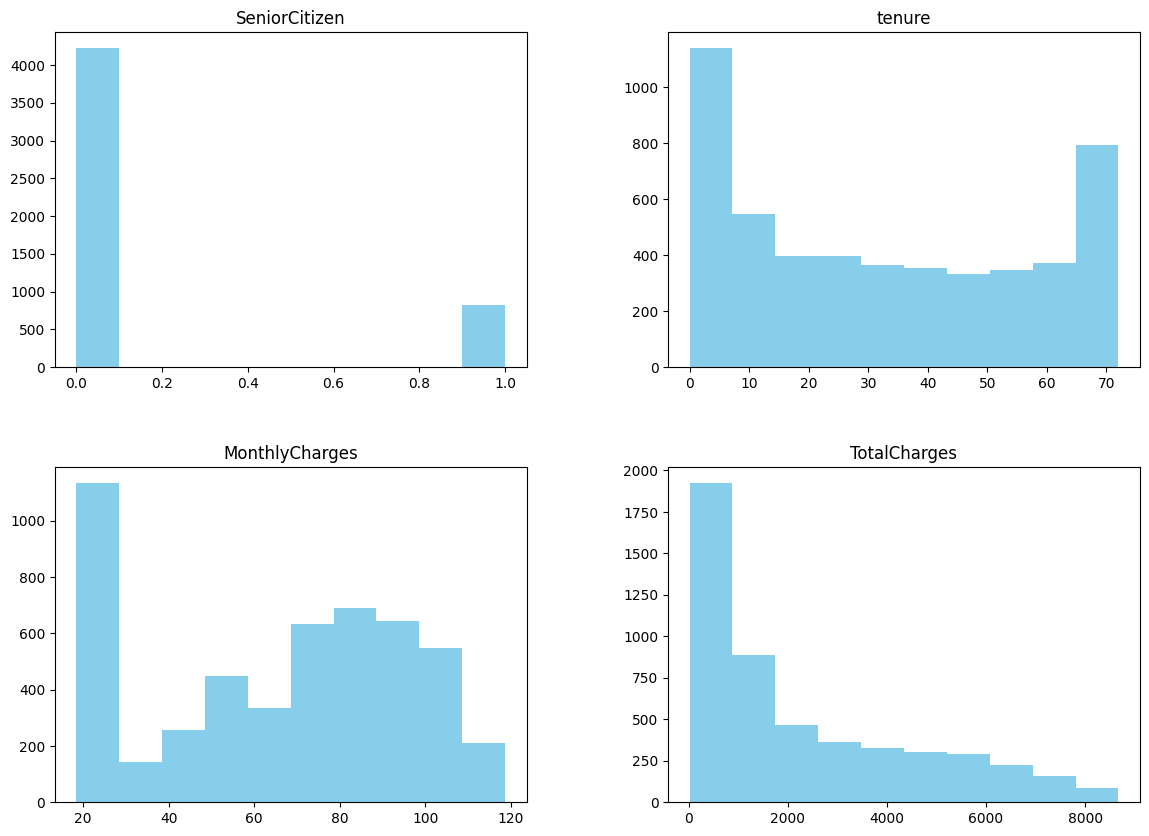

In [19]:
# Distribution of Numerical Feature
churn_prime.hist(figsize= (14,10),grid=False, color='skyblue')
plt.show()

- Used a histogram to see the ditribution of our data and its unevenly distributed-Proof of what we could pick from the statistical analysis- and as per the visuals, 3 graphs are bimodal (having two curves or 2 major bends) instead of havig one curve like a bell shape and the total charge being unimodal with a long tail as also seen below in the kde plots. 

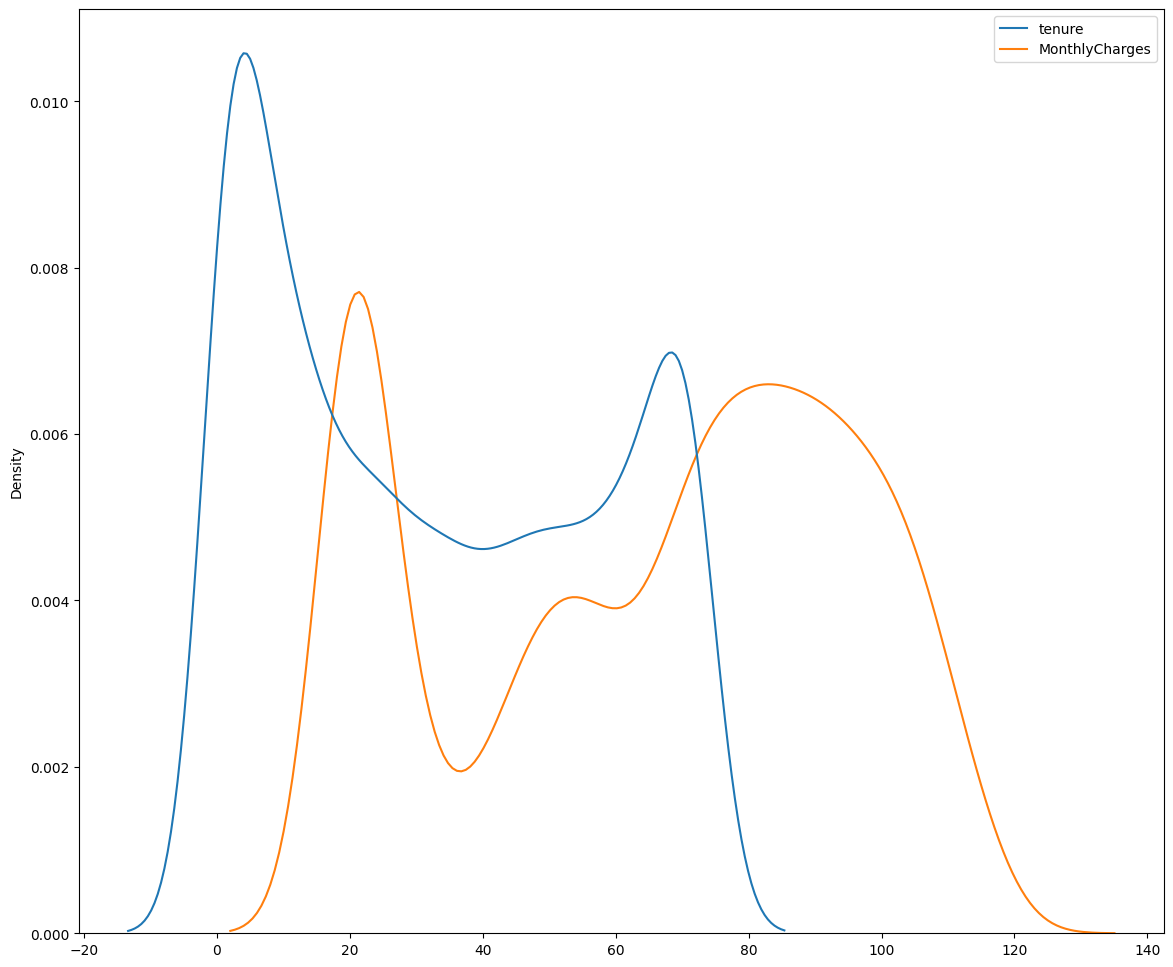

In [20]:
# Create a figure with the specified size
plt.figure(figsize=(14,12))
sns.kdeplot(churn_prime.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
plt.grid(False)
plt.show()

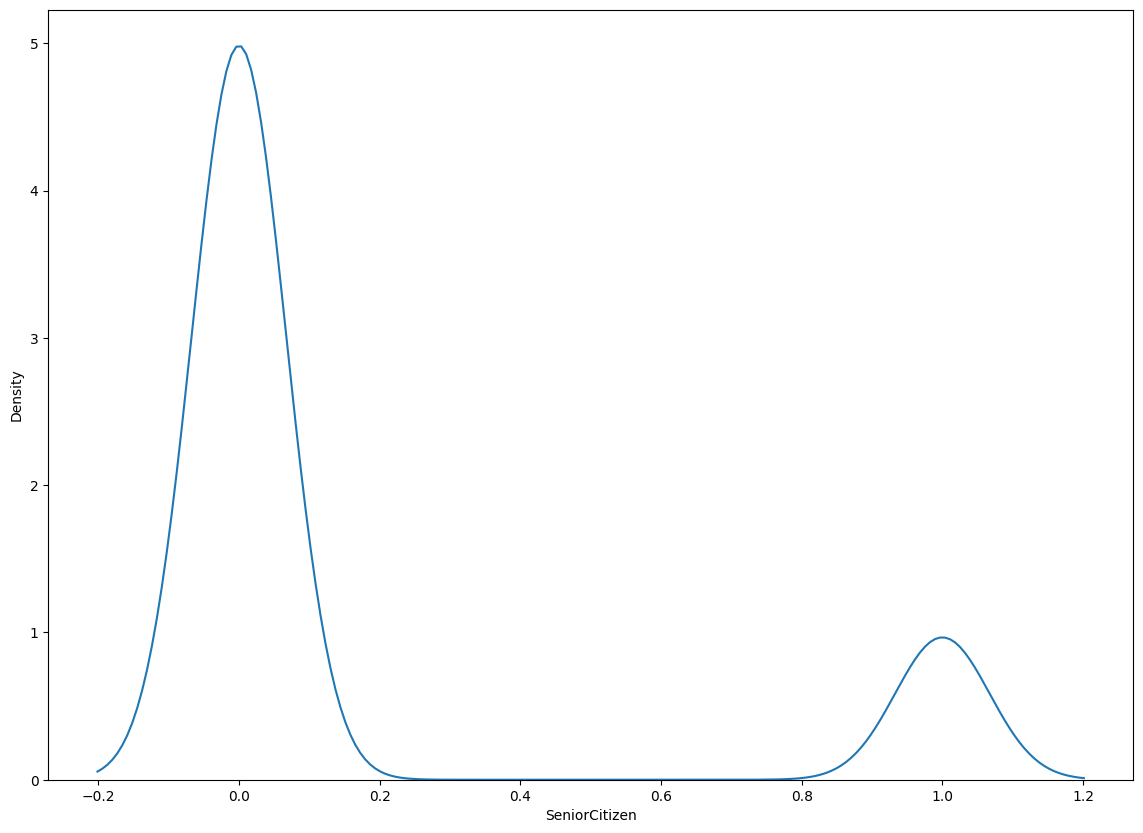

In [21]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['SeniorCitizen'])
plt.grid(False)
plt.show()

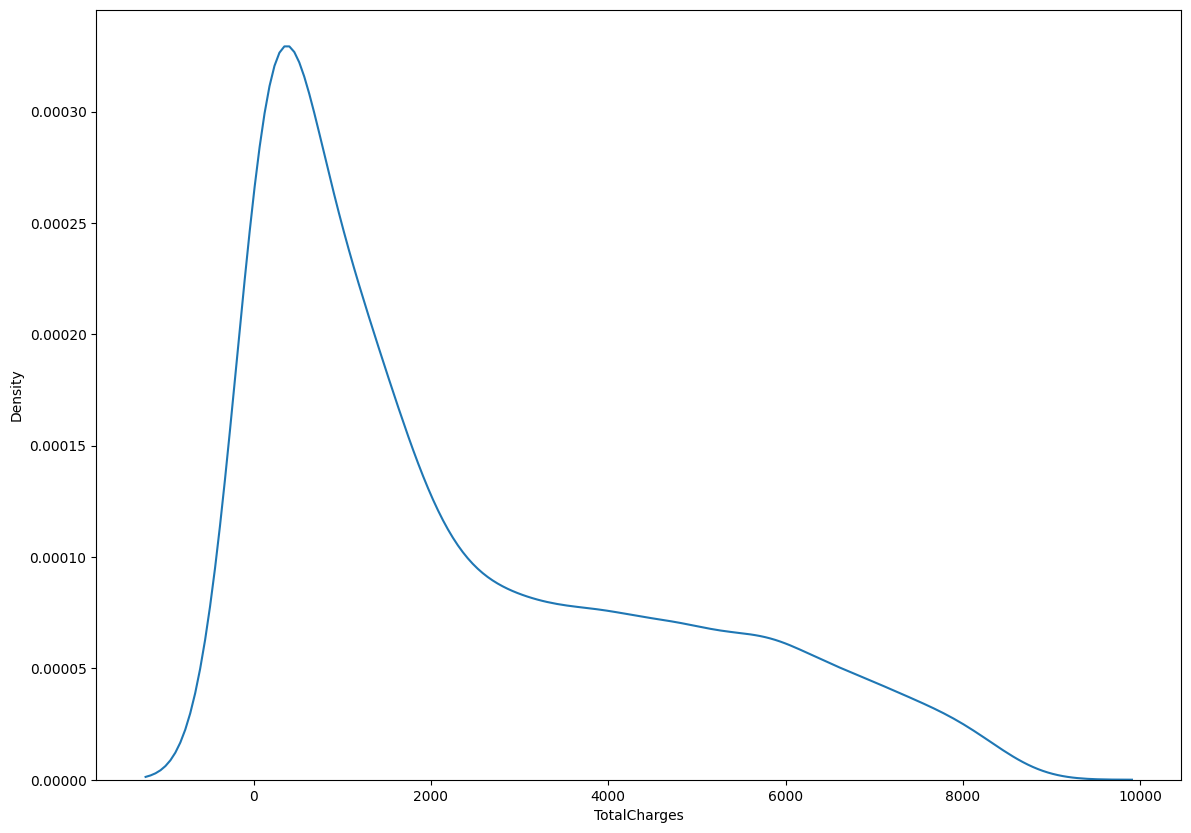

In [22]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['TotalCharges'])
plt.grid(False)
plt.show()

- The kde plot also concurs with previous findings on distribution and also in the  Total charge we can spot  a long tail suggesting that we could also have outliers in the data 

#### Checking for Outliers

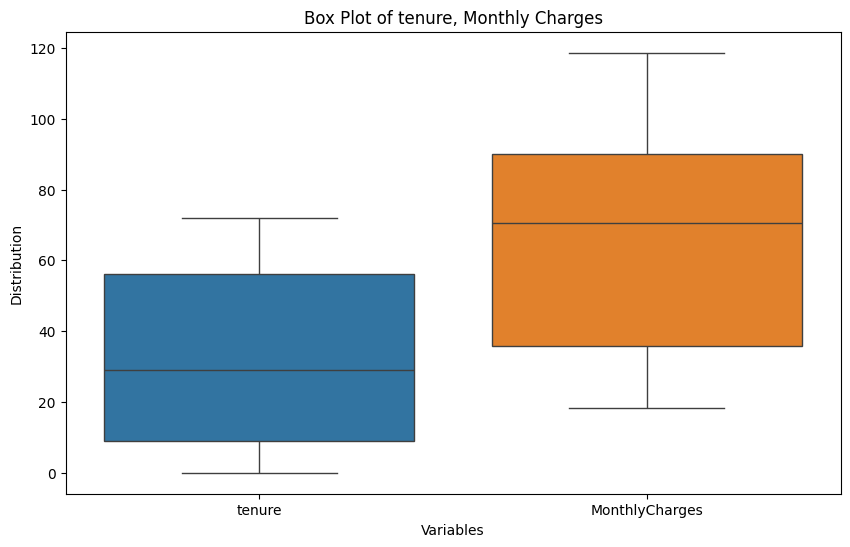

In [23]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['tenure', 'MonthlyCharges']],  whis=1.5)

# Add titles and labels
plt.title('Box Plot of tenure, Monthly Charges')
plt.xlabel('Variables')
plt.ylabel('Distribution')

plt.grid(False)

# Display the plot
plt.show()


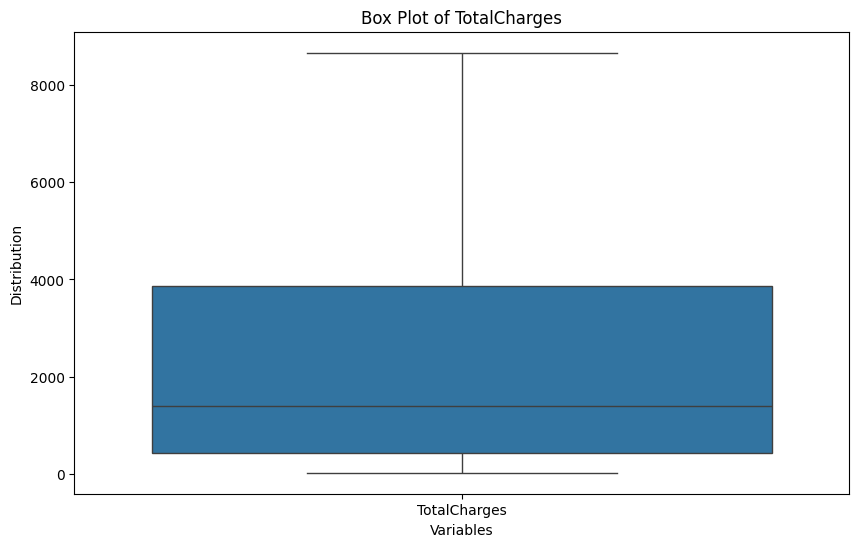

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['TotalCharges']],  whis=4.5)
 
# Add titles and labels
plt.title('Box Plot of TotalCharges')
plt.xlabel('Variables')
plt.ylabel('Distribution')
 
plt.grid(False)
 
# Display the plot
plt.show()

- Although the box plot is not able to capture extreme values, we can see in the KDE plot a long tail suggesting the presence of outliers in our dataset. Additionally, from the statistical analysis, the large standard deviation and the difference between the mean and median for TotalCharges further indicate that there are significant variations in the data, which likely include outliers. This will inform the decison moving forward we can consider using robust scaller and not minmax which is sensitive to outliers.

#### **Bivariate Analysis**

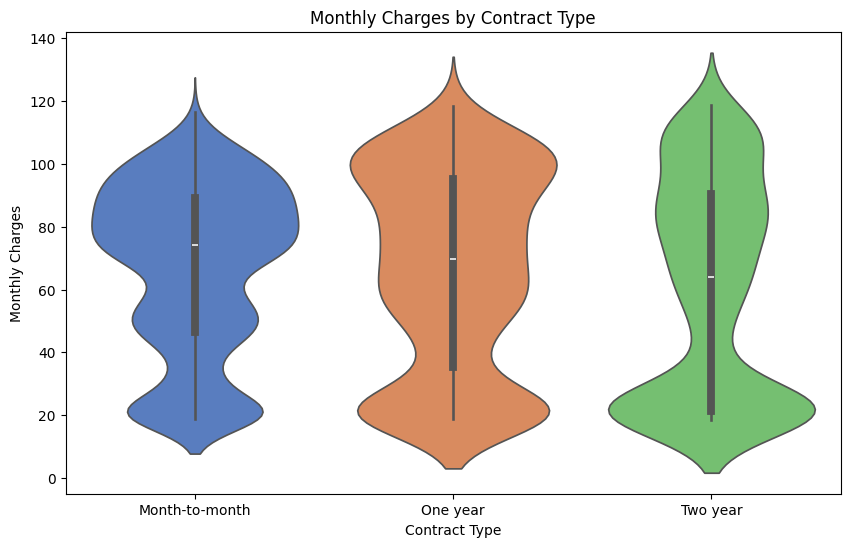

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='MonthlyCharges', data=churn_prime, palette='muted')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()


- From the violin plots above, we can deduce that customers on month to month contract pay higher monthly charge. While For One year contact type  we have a group that pays a significantly lower monthly charge amount but the majority in this group paying a higer monthly charge and For the two year contract we have a majority paying significantly lower monthly charges this is as per the density distribution 
- As per the median value, it higher on the month to month and reduces as we move toward two year contract type also showing that pople i month to month pay higher monthly charges than those in two years contract type. 

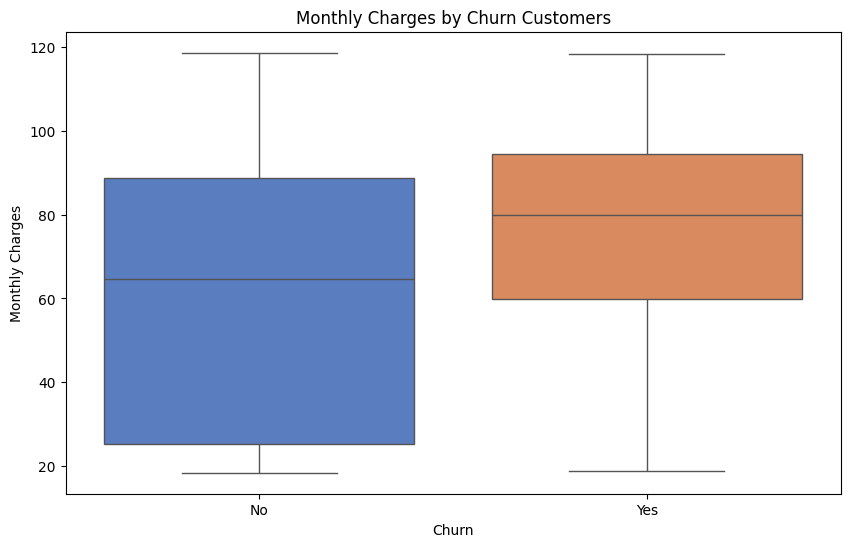

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_prime, palette='muted')
plt.title('Monthly Charges by Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


- From the above boxplot, Higher monthly charges are associated with increased customer churn, but there's significant overlap in charges between churned and non-churned customers, suggesting other factors also influence churn.

#### **Maltivariate Analysis**

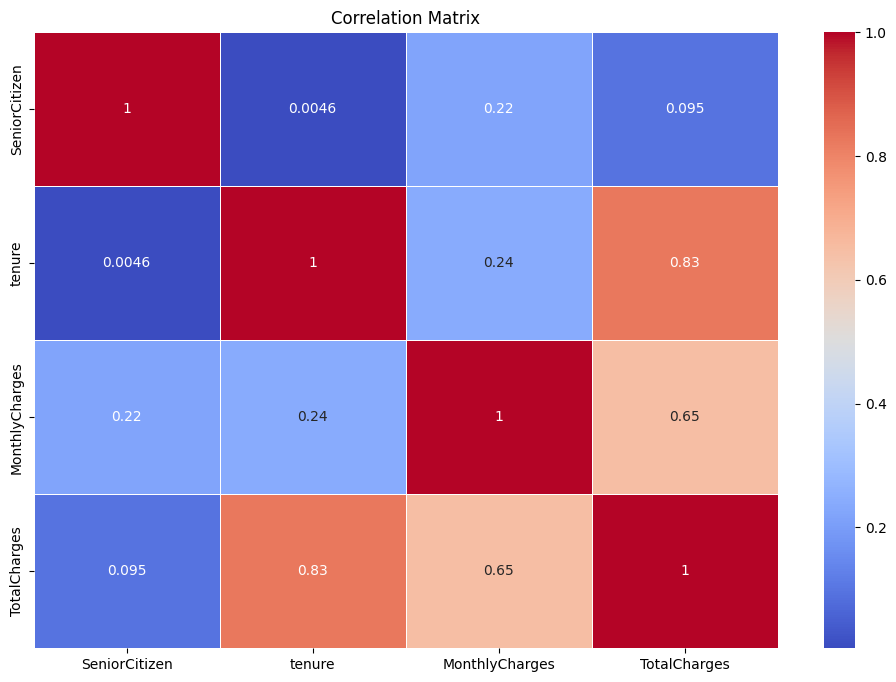

In [27]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

numeric_df = churn_prime.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From this corelation matrix we can deduce the folowing :
- The strongest correlation (0.83) is between tenure and total charges, indicating that longer-term customers tend to have higher total charges.
- Monthly charges and total charges have a moderately strong correlation (0.65), which is expected as higher monthly charges would contribute to higher total charges.
- There's a weak positive correlation (0.24) between tenure and monthly charges, suggesting that longer-term customers may have slightly higher monthly rates.
- The "Senior Citizen" variable has very weak correlations with other variables, with the strongest being a weak positive correlation (0.22) with monthly charges.
- Tenure and total charges show the weakest correlation (0.0046) with the Senior Citizen variable, suggesting that being a senior citizen has little to no relationship with how long a customer stays or their total spending.

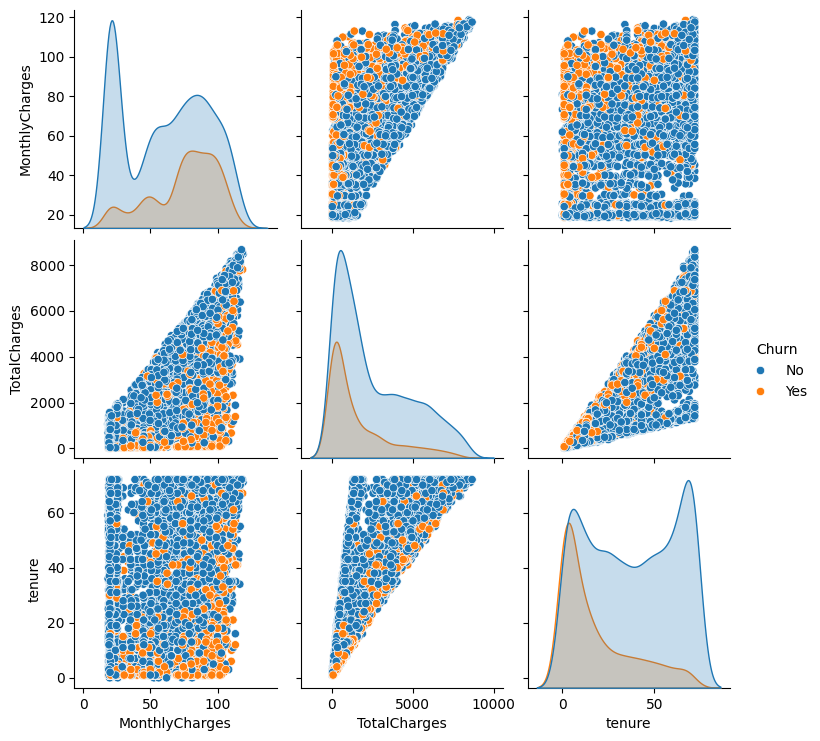

In [28]:
sns.pairplot(churn_prime[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

Unlike the correlation matrix, Pair plot bring in churn into the picture. And we can see the relataionship between the numerical variables and deduce the following ;
- MonthlyCharges vs Churn- Higher monthly charges are associated with a higher likelihood of churn (more orange dots at higher values).
- TotalCharges vs Churn- There's a less clear relationship, but churned customers (orange) seem slightly more concentrated at lower total charges.
- Tenure vs Churn- Customers with shorter tenure are more likely to churn (more orange dots at lower tenure values)
- MonthlyCharges vs TotalCharges- Strong positive correlation, as expected
- Tenure vs TotalCharges- Positive correlation; longer tenure generally means higher total charges
- MonthlyCharges vs Tenure- Weak positive relationship; slight tendency for longer-tenured customers to have higher monthly charges
- Churn patterns- Churned customers (orange) are more prevalent in areas of high monthly charges, low total charges, and low tenure
- On distribution
                - MonthlyCharges has Multimodal distribution
                - TotalCharges is Right-skewed
                - Tenure has Bimodal distribution with peaks at low and high values

#### **2. Categorical Columns EDA**

#### **Distribution and Counts for Categorical variables**

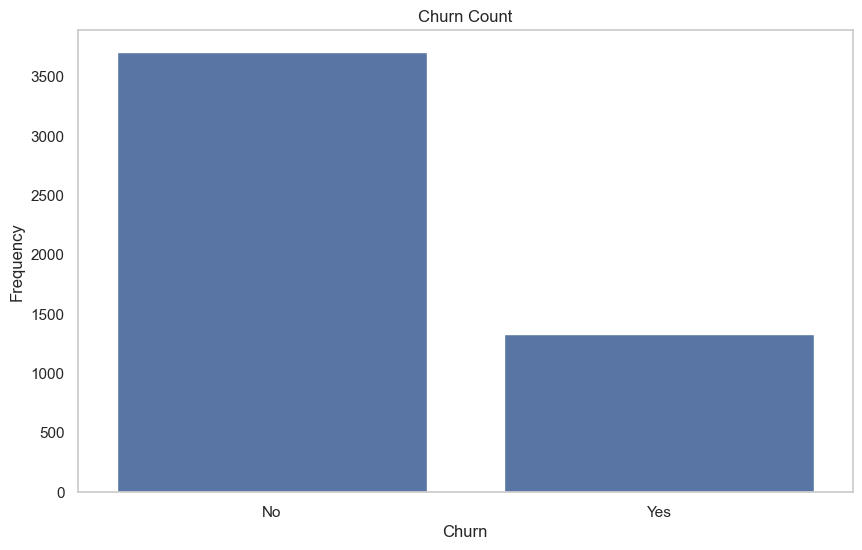

In [29]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='Churn', order=churn_prime['Churn'].value_counts().index)

# Add titles and labels
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

- The Churn column is imbalanced (we have class imbalance), with more 'No' than 'Yes' values. This affects model training, leading to biased predictions. Consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights to balance the dataset during model training.

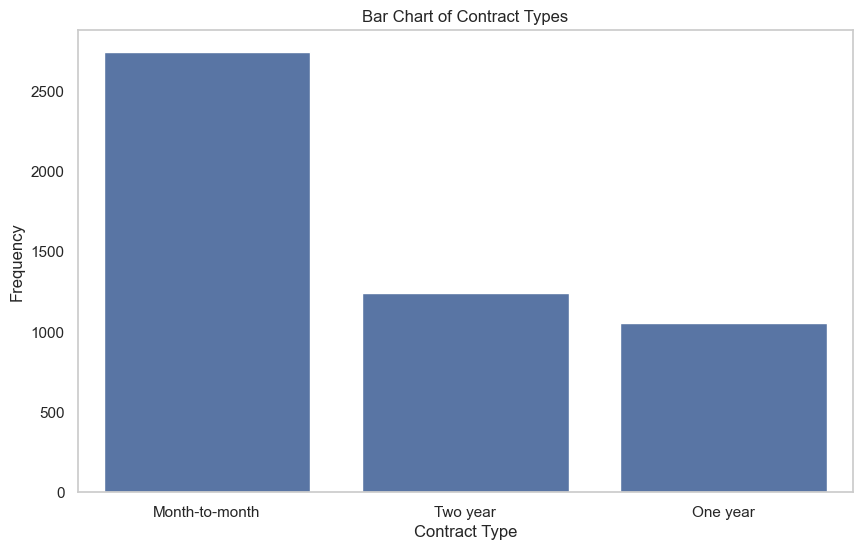

In [30]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='Contract', order=churn_prime['Contract'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

* For the contracts column which will be our focus for the hypothesis we did a bar plot- and realise most customers are on the month to month subscription contract

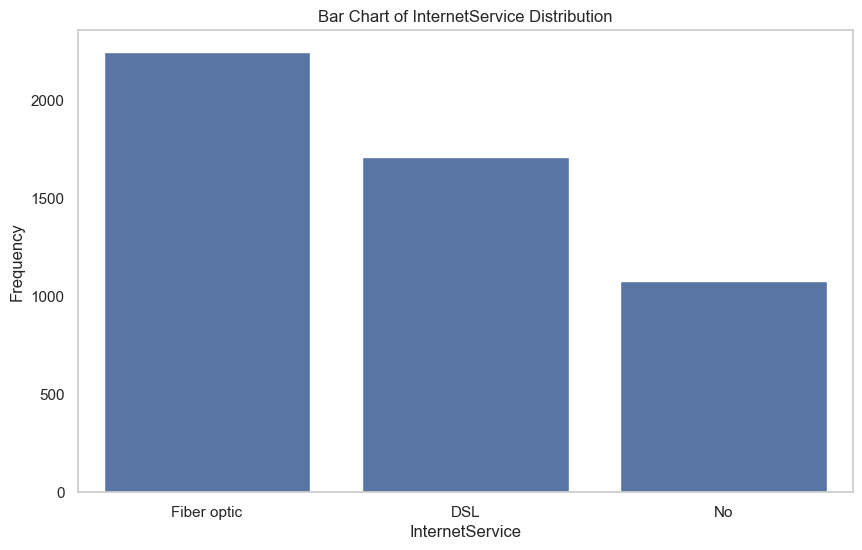

In [31]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='InternetService', order=churn_prime['InternetService'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of InternetService Distribution')
plt.xlabel('InternetService')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

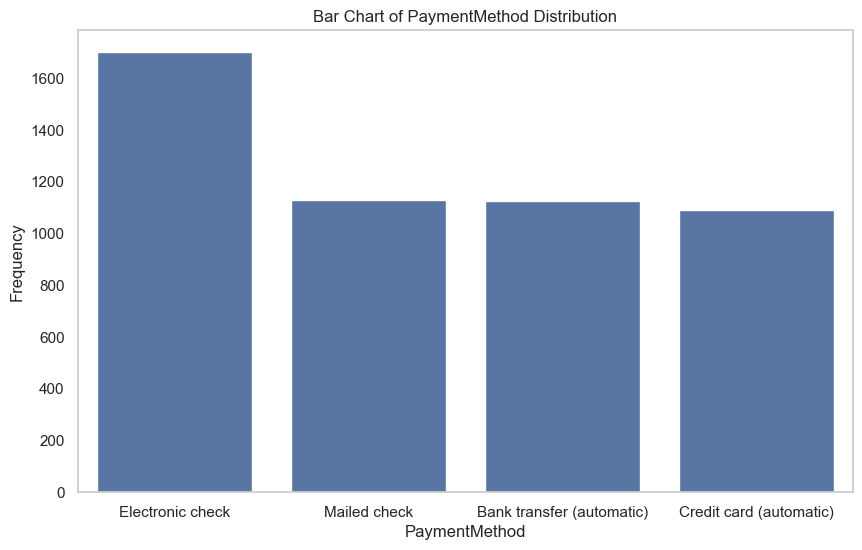

In [32]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='PaymentMethod', order=churn_prime['PaymentMethod'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of PaymentMethod Distribution')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

#### **Hypothesis Testing**

##### Null Hypothesis
 ##### (HO) There is no significant difference in churn rates among customers with different contract types.
##### Alternative Hpothesis
##### (H1) There is a significant difference in churn rates among customers with different contract types.

In [33]:
# Create a copy of the original DataFrame
df_train_chi = churn_prime.copy()

# Drop the row with the unknown value from the Churn column
df_train_chi.drop(index=2988, inplace=True)
df_train_chi.reset_index(drop=True, inplace=True)

# Drop 'customerID' column as it is not needed for analysis
df_train_chi.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_chi['Churn'] = df_train_chi['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_chi['TotalCharges'] = pd.to_numeric(df_train_chi['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns = df_train_chi.select_dtypes(include=['number']).columns
cat_columns = df_train_chi.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_chi[num_columns] = imputer_num.fit_transform(df_train_chi[num_columns])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_chi[cat_columns] = imputer_cat.fit_transform(df_train_chi[cat_columns])

# Create contingency table for Churn and Contract
contingency_table = pd.crosstab(df_train_chi['Churn'], df_train_chi['Contract'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Test")
print("----------------")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.")
else:
    print("Fail to reject the null hypothesis: This means there is no significant difference in churn rates among customers with different contract types.")


Chi-Square Test
----------------
Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192
Degrees of Freedom: 2
Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.


- The chi-square test was utilized to examine whether there are significant variations in churn rates based on different contract types within the Telco dataset
- With a chosen significance level (alpha) of 0.05, the extremely low p-value (3.62e-192) obtained from the test indicates a robust rejection of the null hypothesis.
- Consequently, we reject the null hypothesis that there is no significant difference in churn rates across various contract types.
- This statistical finding provides compelling evidence that contract type plays a critical role in influencing churn rates among Telco customers.

#### **Answering Analytical Questions**

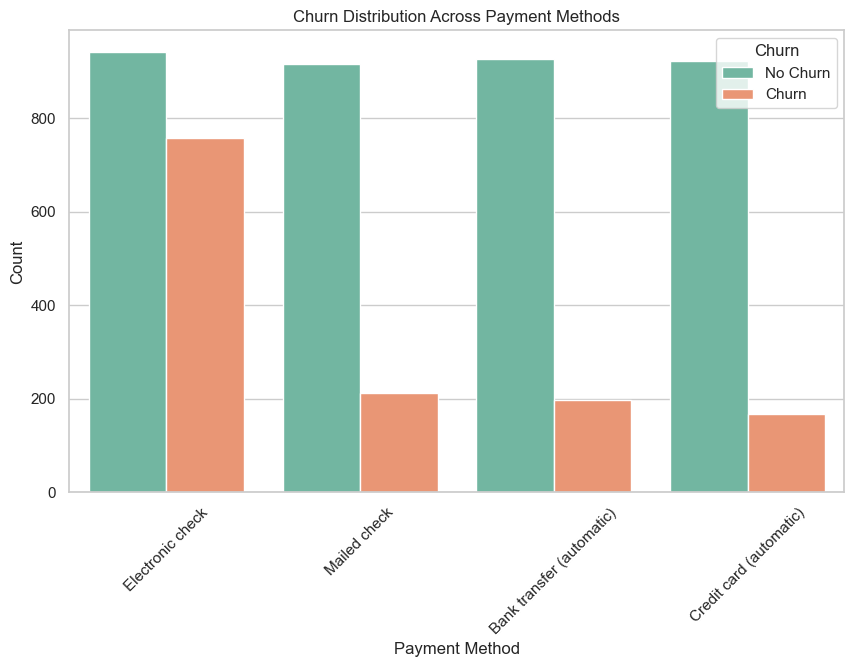

In [34]:
# Q1. How is Churn distributed across the different payment methods

# Countplot of churn across payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn Distribution Across Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

- We notice across all the payment methods those who churned were more than those who did not churn with not much different on churned customers across the different payment methods

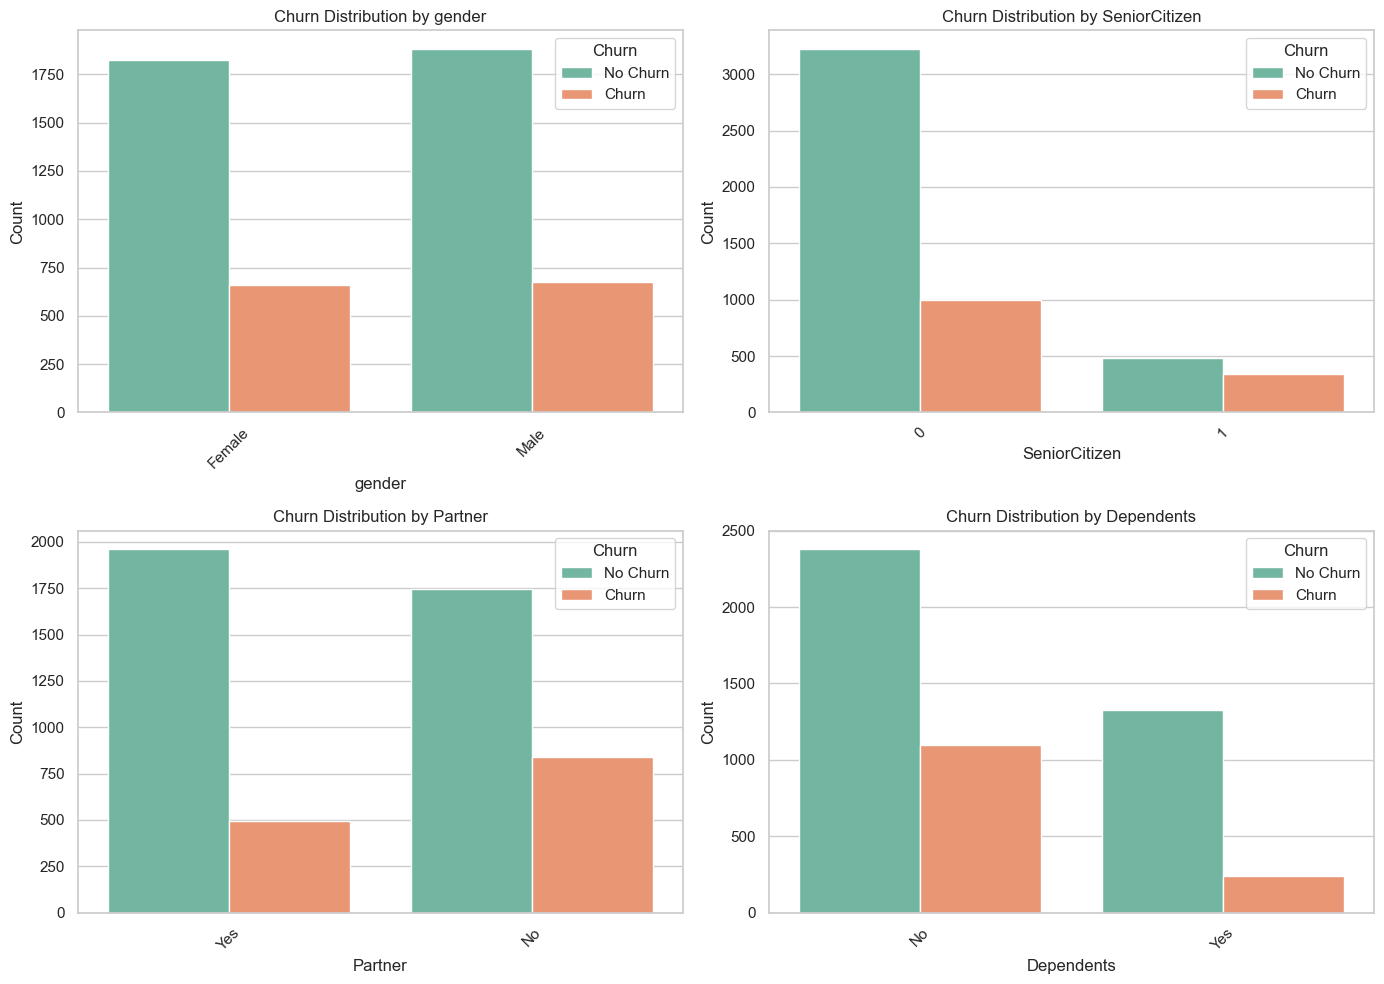

In [35]:
# Q2  Explore how demographic factors relate to churn 

# Define categorical variables related to demographics
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Plotting demographic factors against churn
plt.figure(figsize=(14, 10))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=churn_prime, palette='Set2')
    plt.title(f'Churn Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

plt.tight_layout()
plt.show()


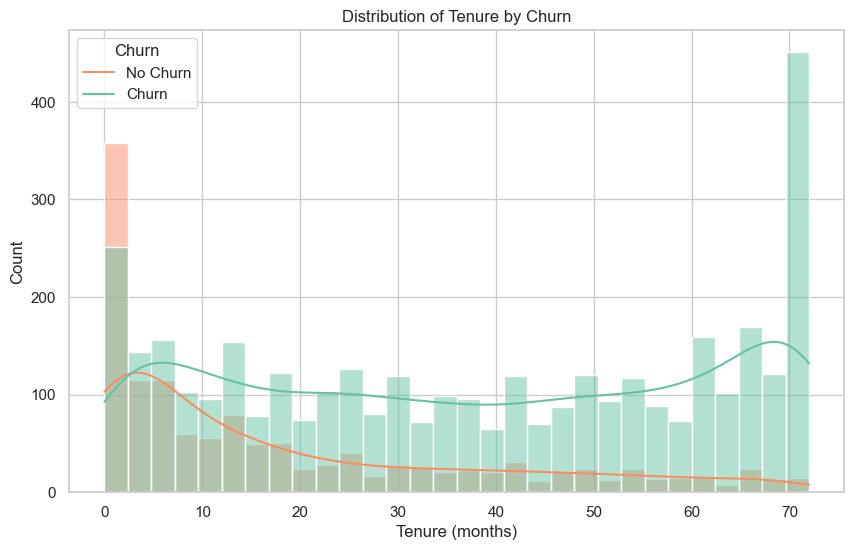

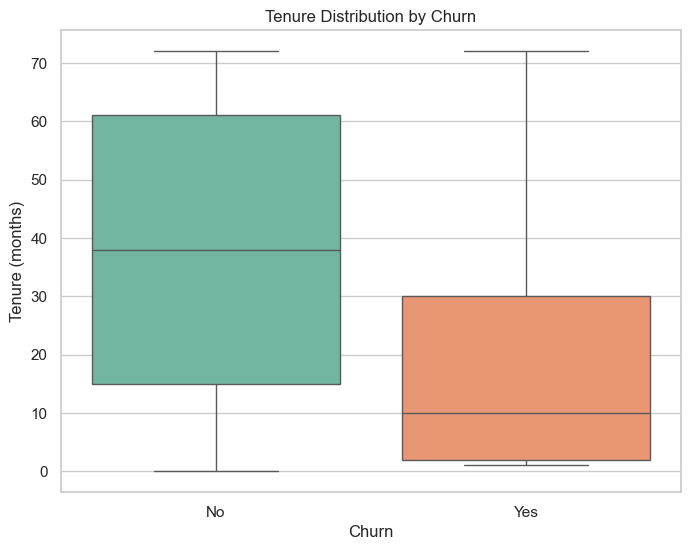

In [36]:
# Q3 How does the tenure of a customer impact their likelihood of churning?

# Histograms of tenure by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_prime, x='tenure', hue='Churn', kde=True, bins=30, palette='Set2')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Boxplot of tenure by churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=churn_prime, palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


In [37]:
# Q4 Is there a significant relation between the type of internet service and customer churn and at what rate?

# Group by InternetService and count churn
internet_churn_counts = churn_prime.groupby('InternetService')['Churn'].value_counts().unstack()

# Display the counts
print("Churn counts by Internet Service:")
print(internet_churn_counts)


Churn counts by Internet Service:
Churn              No  Yes
InternetService           
DSL              1406  309
Fiber optic      1296  951
No               1004   76


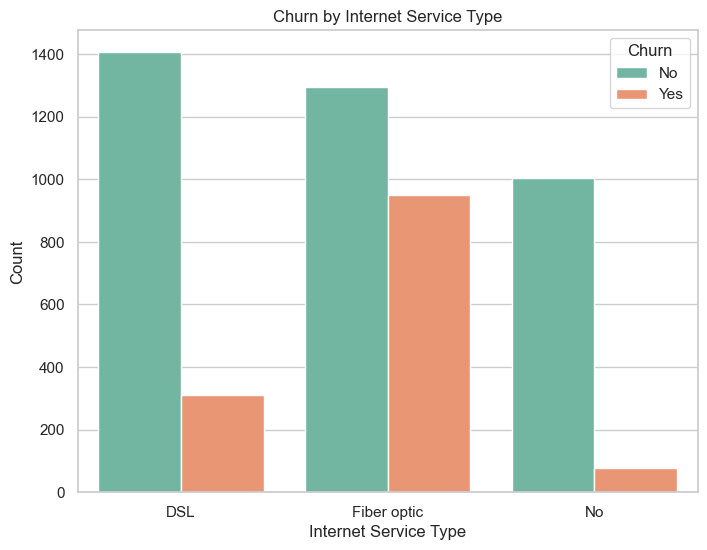

In [38]:
# Bar plot of churn by InternetService
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

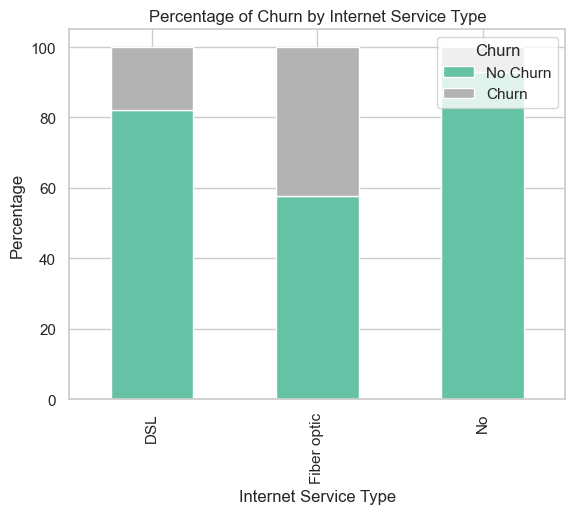

In [39]:
# Calculate percentages
internet_churn_percentages = internet_churn_counts.div(internet_churn_counts.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
internet_churn_percentages.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


In [40]:
#Q5. Do customers with multiple services (e.g., phone service, internet service) show different churn rates compared to those with  fewer services?

# Create a new feature indicating whether the customer has multiple services
churn_prime['MultipleServices'] = churn_prime.apply(lambda x: 'Multiple Services' if (x['PhoneService'] == 'Yes' and 
                                                                                      (x['InternetService'] == 'DSL' or 
                                                                                       x['InternetService'] == 'Fiber optic')) else 'Fewer Services', axis=1)

# Group by MultipleServices and count churn
services_churn_counts = churn_prime.groupby('MultipleServices')['Churn'].value_counts().unstack()

# Display the counts
print("Churn counts by Service Category:")
print(services_churn_counts)


Churn counts by Service Category:
Churn                No   Yes
MultipleServices             
Fewer Services     1373   196
Multiple Services  2333  1140


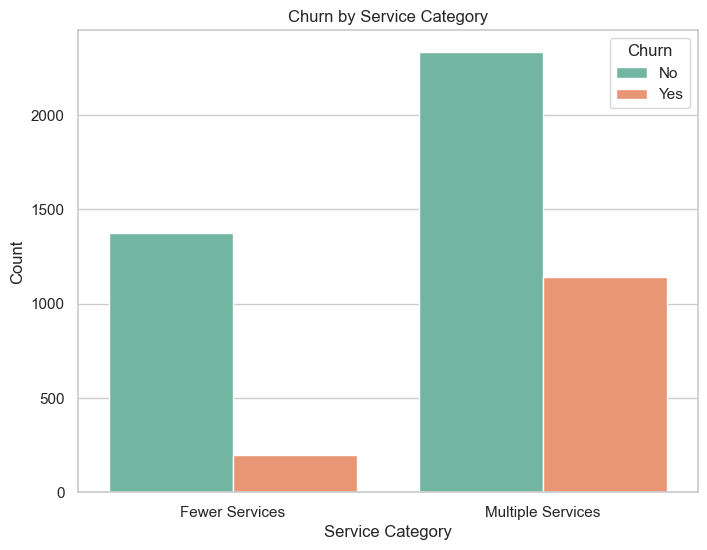

In [41]:
# Bar plot of churn by MultipleServices
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleServices', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

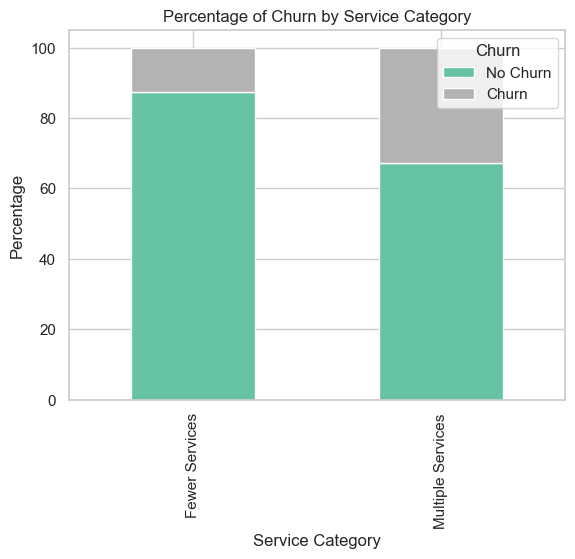

In [42]:
# Calculate percentages
services_churn_percentages = services_churn_counts.div(services_churn_counts.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
services_churn_percentages.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


In [43]:
#Q6 How do different contract types affect customer churn rates?

# Group by Contract type and calculate the churn rate
contract_churn_counts = churn_prime.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn_rates = contract_churn_counts.div(contract_churn_counts.sum(axis=1), axis=0) * 100

# Display the counts and rates
print("Churn counts by Contract Type:")
print(contract_churn_counts)
print("\nChurn rates by Contract Type:")
print(contract_churn_rates)

Churn counts by Contract Type:
Churn             No   Yes
Contract                  
Month-to-month  1560  1184
One year         933   122
Two year        1213    30

Churn rates by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  56.851312  43.148688
One year        88.436019  11.563981
Two year        97.586484   2.413516


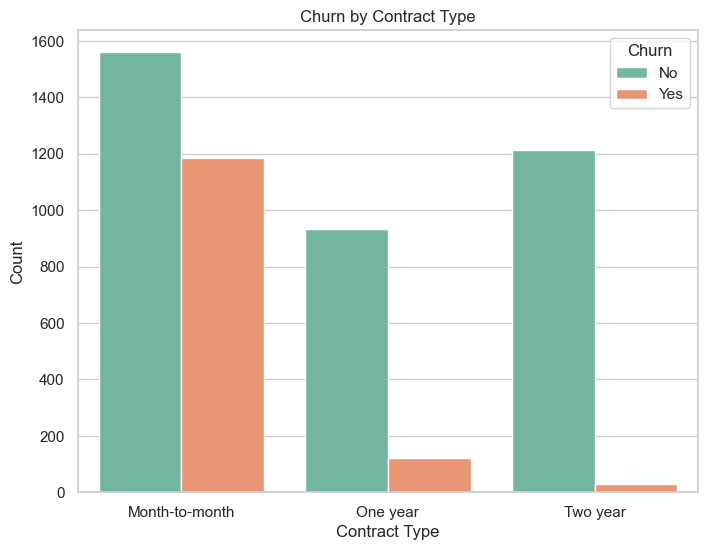

In [44]:
# Bar plot of churn by Contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

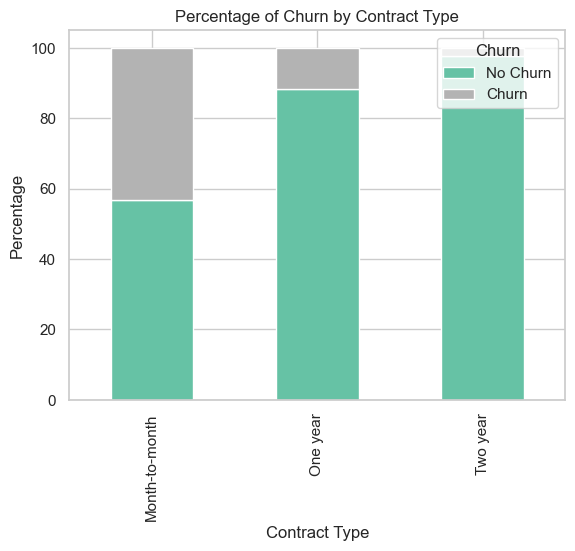

In [45]:
# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
contract_churn_rates.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


### **Data Preparation**

#### Handling misssing values 

In [46]:
churn_prime['TotalCharges'].fillna(churn_prime['TotalCharges'].median(), inplace=True) # TotalCharges column 


In [47]:
miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',               #For missing values in categorical columns 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Churn']

for col in miss_categ:
    mode_val = churn_prime[col].mode()[0]                                      
    churn_prime[col].fillna(mode_val, inplace=True)

In [48]:
# convert churn_prime to csv for Power Bi Visualisation before further Modeling

churn_prime.to_csv('churn_prime.csv', index= False)

##### Drop the Cutomer Id Column it doe not have any statistical  or computational significance and has too many unknown categories  that will affect the encoding process

In [49]:
churn_prime = churn_prime.drop('customerID', axis=1)

In [50]:
churn_prime.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleServices    0
dtype: int64

####  Split data to X and y (Input and Output variables )

In [51]:
# Input variables

X= churn_prime.drop ('Churn', axis= 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleServices
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,Fewer Services
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,Multiple Services
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Multiple Services
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,Fewer Services
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Multiple Services


In [52]:
# Output variable / target variable 
y= churn_prime['Churn']
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [53]:
(X.shape, y.shape) 

((5043, 20), (5043,))

#### Split data to categorical and numerical columns

In [54]:
numerical_columns= X.select_dtypes('number').columns
numerical_columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [55]:
categorical_columns= X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MultipleServices'],
      dtype='object')

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4034, 20), (4034,)), ((1009, 20), (1009,)))

In [57]:
# We use a lable encoder for y because its not a 2 dimentional array 

encoder = LabelEncoder()

# Fit the encoder to the target variable
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded= encoder.transform(y_test)


In [58]:
# Check skewness to determine which scaler to use 
X.select_dtypes('number').skew()

SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.946284
dtype: float64

Descison
Standard scaler is disqualified as our data not anything close to a bell shape 
MinMax scaller is diqualified as our data has outliers 
We use Robust Scaler due to the biases in X train  

In [59]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2300.633691,2267.965879,18.799999,418.000,1401.150024,3857.575073,8670.100000


We decide on Quantile transformer as it transform our data to a close to a bell shape

#### *Pipeline*

In [60]:
numeric_pipeline= Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('QuantileTransformation', QuantileTransformer ()),
])

categorical_pipeline= Pipeline([
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('encoder', OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),

])

In [61]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('QuantileTransformation',
                                                  QuantileTransformer())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MultipleServices'],
      dtype='object'))])

#### **Modeling & Evaluation**

#### Train on unbalanced data 

In [62]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]


# Arrays to store individual model predictions and their probabilities
model_predictions = {}
model_probabilities = {}

# Store confusion matrices for each model
confusion_matrices = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Store predictions and probabilities
    model_predictions[model_name] = y_pred
    model_probabilities[model_name] = y_prob

    # Store confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm

    # Evaluate model performance
    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test_encoded, y_prob)

    # Print ROC AUC score
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('=' * 50)

 

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

ROC AUC Score: 0.8526
Random Forest
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       742
           1       0.62      0.54      0.58       267

    accuracy                           0.79      1009
   macro avg       0.73      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009

ROC AUC Score: 0.8364
KNN
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       742
           1       0.53      0.51      0.52       267

    accuracy                           0.75      1009
   macro avg       0.68      0.67      0.68   

In [63]:
# Convert confusion matrices to DataFrame
df_scores = pd.DataFrame.from_dict({model_name: [conf_matrix] for model_name, conf_matrix in confusion_matrices.items()}, orient='index', columns=['confusion_matrix'])
df_scores 

,confusion_matrix
Logistic Regression,"[[659, 83], [117, 150]]"
Random Forest,"[[653, 89], [122, 145]]"
KNN,"[[620, 122], [130, 137]]"
SVM,"[[661, 81], [124, 143]]"
GBM,"[[657, 85], [117, 150]]"
Neural Network,"[[630, 112], [109, 158]]"


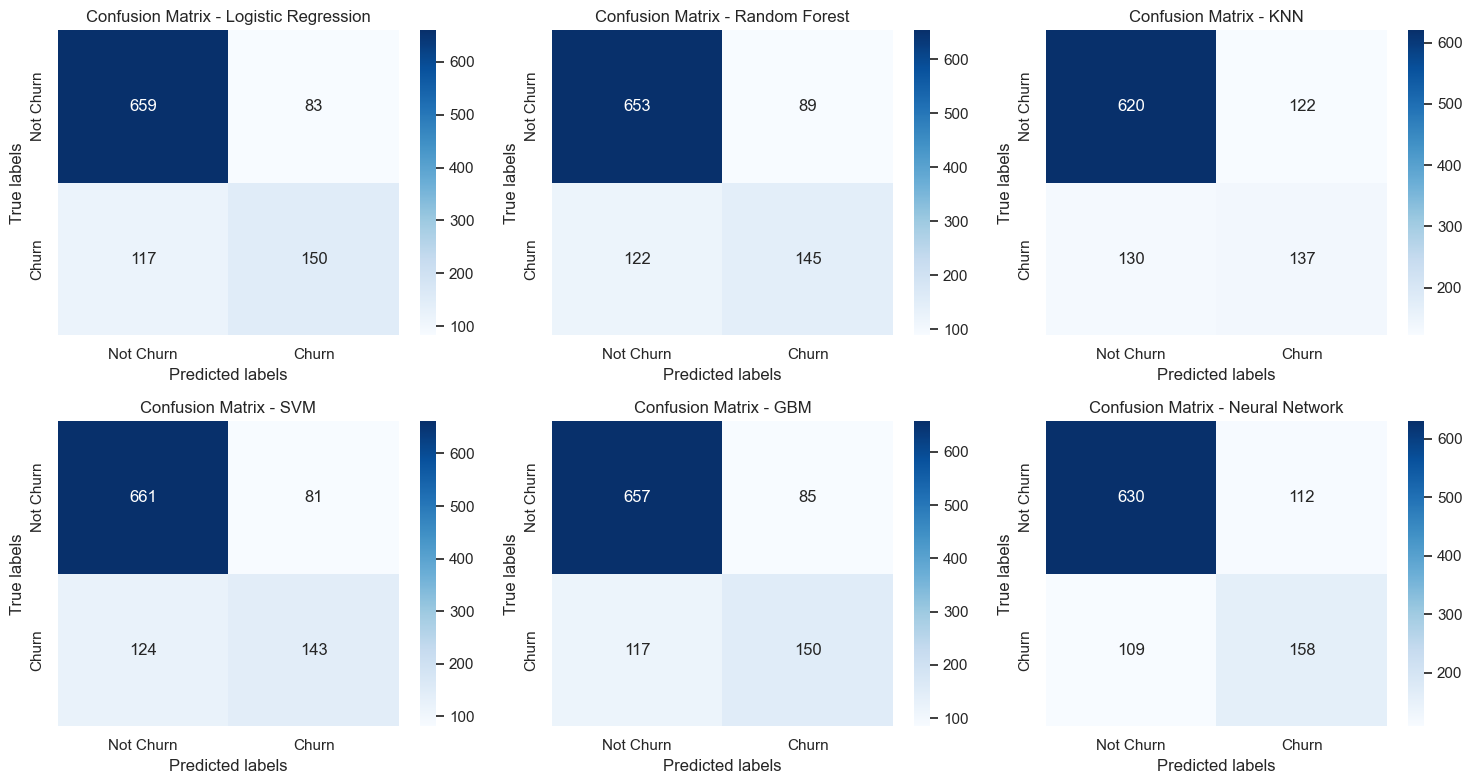

In [64]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(df_scores)

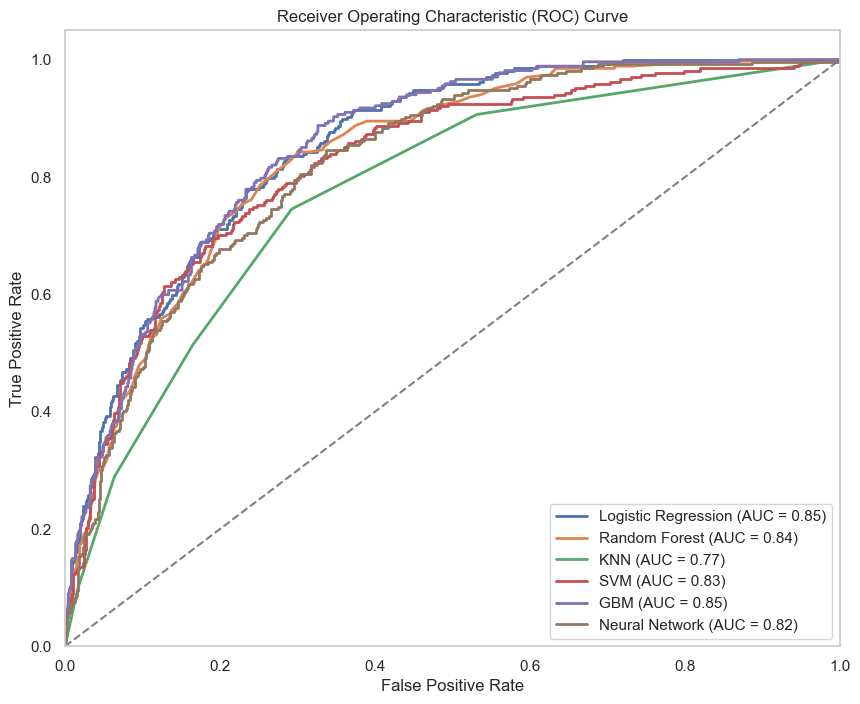

In [65]:
# Plot ROC AUC curve for all models
plt.figure(figsize=(10, 8))

# Iterate over each model's probabilities and plot ROC curve
for model_name, y_prob in model_probabilities.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

#### **Hyperparameter Tuning**

In [66]:
#Define parameter grids for tuning

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    },
    'GBM': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    }
}

In [67]:
# Perform Hyperparameter Tuning

best_estimators = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train_encoded)
    
    # Store the best estimator
    best_estimators[model_name] = grid_search.best_estimator_

    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    auc_roc = roc_auc_score(y_test_encoded, y_prob)
    
    # Print best parameters and ROC AUC score
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best ROC AUC score for {model_name}: {grid_search.best_score_:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    print('=' * 50)

Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'newton-cg'}
Best ROC AUC score for Logistic Regression: 0.8498
Accuracy: 0.7810
Precision: 0.5852
Recall: 0.5918
F1 Score: 0.5885
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best ROC AUC score for Random Forest: 0.8481
Accuracy: 0.7810
Precision: 0.5852
Recall: 0.5918
F1 Score: 0.5885
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best ROC AUC score for KNN: 0.8113
Accuracy: 0.7810
Precision: 0.5852
Recall: 0.5918
F1 Score: 0.5885


Train on balanced data 

In [ ]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]

#### Train on balanced data 

In [ ]:
balanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('OverSampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    balanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
 
    balanced_table.loc[len(balanced_table)]= [model_name, accuracy, precision, recall,f1]
 
balanced_table.sort_values(by='F1_Score')

In [ ]:
# View balanced data pipelines 
balanced_pipeline

#### Answering Analytical Questions 

In [ ]:
  #1. What is the Churn percentage as compared to paymment method 

churn_percentage = churn_prime.groupby('PaymentMethod')['Churn'].mean() * 100 
churn_percentage = churn_percentage.reset_index()
churn_percentage.columns = ['PaymentMethod', 'ChurnPercentage']
print(churn_percentage)


# Create a bar plot of churn percentage by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='ChurnPercentage', data=churn_percentage)

# Add title and labels
plt.title('Churn Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.grid(False)

# Show plot
plt.show()


In [ ]:
 #2. How does key demographic factors (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') influence customer churn?


# Define the demographic features
demographic_features = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# Plotting the churn rates for each demographic feature
plt.figure(figsize=(14, 10))

for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    churn_rates = churn_prime.groupby(feature)['Churn'].mean() * 100
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate (%)')
    plt.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
#6. How do different contract types affect customer churn?

# Plotting the count of churn for each contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_prime, x='Contract', hue='Churn', palette='muted')
plt.title('Comparison of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
 #3. How does the tenure of a customer impact their likelihood of churning?


np.random.seed(0) #enuring the starting point is the same every time
n_customers = 1000 # Setting a sumple for number if customers we are working with in this particular graph
tenure_months = np.random.randint(1, 36, size=n_customers) #Generate tenure data to ensure we simulate the number of months the customer has been 
churn_prob = np.clip(0.05 * tenure_months, 0, 0.8)  # Calculate churn probability
churned = np.random.random(size=n_customers) < churn_prob # Generating churn data
churn_prime = pd.DataFrame({'tenure': tenure_months, 'Churn': churned}) # Create a dataframe with the generated tenure and churn data

# Define tenure buckets 
tenure_bins = [0, 6, 12, 18, 24, 30, 36]
tenure_labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36']

# Assign each customer to a tenure bucket
churn_prime['tenure_bucket'] = pd.cut(churn_prime['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calculate churn rates for each tenure bucket
churn_rates = churn_prime.groupby('tenure_bucket')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()


In [ ]:
 #4. Is there a significant correlation between the type of internet service and customer churn?

from scipy.stats import chi2_contingency
# Data generation 
np.random.seed(0)
data = pd.DataFrame({
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=1000),
    'Churn': np.random.choice([0, 1], size=1000)
})

# Calculate churn rates by internet service type
churn_rates = data.groupby('InternetService')['Churn'].mean() * 100

# Perform chi-square test
contingency_table = pd.crosstab(data['InternetService'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print chi-square test results
print(f'Chi2 Statistic: {chi2}')
print(f'P-Value: {p}')

# Plot churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

# Interpretation
if p < 0.05:
    print("There is a significant association between Internet Service Type and Churn (p < 0.05).")
else:
    print("There is no significant association between Internet Service Type and Churn (p >= 0.05).")


In [ ]:
#5. Do customers with multiple services show different churn rates compared to those with  fewer services?

# Data generation 
np.random.seed(0)
n_customers = 1000
data = pd.DataFrame({
    'PhoneService': np.random.choice(['Yes', 'No'], size=n_customers),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_customers),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], size=n_customers),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'Churn': np.random.choice([0, 1], size=n_customers)
})

# Define a function to count the number of services a customer has
def count_services(row):
    services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    count = 0
    for service in services:
        if row[service] in ['Yes', 'DSL', 'Fiber optic']:
            count += 1
    return count

# Create a new column for the number of services
data['NumberOfServices'] = data.apply(count_services, axis=1)

# Calculate churn rates by number of services
churn_rates = data.groupby('NumberOfServices')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
plt.title('Churn Rate by Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()


In [ ]:
#from sklearn.impute import SimpleImputer #filling mising values

# For categorical features, use the most frequent value
#categorical_imputer = SimpleImputer(strategy='most_frequent')

# For numerical features, use the median
#numerical_imputer = SimpleImputer(strategy='median')

In [ ]:
# Inspect data 
#churn_prime.isnull().sum()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder #Encoding

#categorical_encoder = OneHotEncoder(handle_unknown='ignore')


In [ ]:
#from sklearn.preprocessing import StandardScaler #Standardizing our data 

#numerical_scaler = StandardScaler()


In [ ]:
#from sklearn.pipeline import Pipeline # Create a preprocesing pipeline 

#categorical_pipeline = Pipeline([
   # ('imputer', categorical_imputer),
    #('encoder', categorical_encoder)
#])

#numerical_pipeline = Pipeline([
   # ('imputer', numerical_imputer),
    #('scaler', numerical_scaler)
#])


In [ ]:
#from sklearn.compose import ColumnTransformer # Combine our pipelines 

#preprocessor = ColumnTransformer([
    #('cat', categorical_pipeline, categorical_features),
    #('num', numerical_pipeline, numerical_features)
#])


In [ ]:
#from sklearn.ensemble import RandomForestClassifier # Build the final pipeline with  a ml model

#model = Pipeline([
    #('preprocessor', preprocessor),
   # ('classifier', RandomForestClassifier())
#])


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #train and evaluate the model 

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)

# Evaluate the model
#print('Accuracy:', accuracy_score(y_test, y_pred))
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
#print('Classification Report:\n', classification_report(y_test, y_pred))


#### Checklist 
    - Missing values are handled 
    - True to yes and false to no 
    - Column names renaming 
    - Monthlycharge and Totalcharge columns need standardized decimals
    - Total charges column should be a float datatype
    - At least 5 Univariate Bivariate Multivariate Analysis 
    - Categorical columns analysis 
    - Hypothesis 
    - Visuals should check colinearity  Churn rate distribution
    - Analytical Questions 
    - Atleast 4 models
    - Evaluation
    - Choose 1 model - key metrics must be met 
    - Hyperparameter tuning must 
    - Predict test set and visualize resulst
    - Ensure to highlight at least 5 key insights, challanges and way forward 
    - Must have a conclusion